## Airbnb Analysis

#### Load Library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

#### Load Data

In [2]:
Airbnb = pd.read_csv(r"C:\Users\dell\OneDrive\Desktop\Airbnb_Open_Data.csv")

In [3]:
# read Sample 15 rows 
Airbnb.sample(15)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
38352,22183146,"Smart Studio in Trendy Tribeca, Indoor pool + ...",47388084852,verified,Blueground,Manhattan,Tribeca,40.71532,-74.00645,United States,...,$101,30.0,1.0,2/8/2019,0.20,5.0,232.0,331.0,"- Clean up after yourself, be respectful, and ...",NaN
88707,49994212,Cheap $45/night@15 minuets to Mahattaton,258866933,verified,Jazzy,Queens,Elmhurst,40.74647,-73.88258,United States,...,$178,3.0,2.0,7/7/2019,0.06,5.0,1.0,358.0,"- No smoking in the building, please and than...",NaN
46419,26638550,"Cozy house in Woodside, comfortable are!!",22642120149,unconfirmed,Shogo,Queens,Woodside,40.74239,-73.89454,United States,...,$15,29.0,NaN,NaN,NaN,4.0,15.0,5.0,NaN,NaN
63338,35982913,Lovely Room |Private BATHROOM,29811306211,verified,Kristina & Jack,Queens,Ridgewood,40.70038,-73.90390,United States,...,$206,30.0,3.0,10/9/2021,0.37,4.0,24.0,334.0,NaN,NaN
84215,47513281,Luxury 2200ft² 4Bed in East Village,58268536955,verified,Jonty,Manhattan,Gramercy,40.73268,-73.98551,United States,...,$218,5.0,87.0,6/22/2019,2.12,1.0,1.0,350.0,NaN,NaN
76524,43265541,Lux 2 Bedroom NYC Apt on the Hudson River!,59872864093,unconfirmed,Kara,Manhattan,Hell's Kitchen,40.76253,-73.99803,United States,...,$147,30.0,0.0,NaN,NaN,5.0,121.0,185.0,- Please treat this home as your own and respe...,NaN
49087,28112086,Amazing private bedroom next to Central Pk & Sub,25331393151,unconfirmed,Eva,Manhattan,Upper West Side,40.79993,-73.96475,United States,...,$40,3.0,0.0,NaN,NaN,3.0,1.0,44.0,NaN,NaN
100669,56600825,Bright and Cozy 1BR in Crown Heights,36114607787,verified,Morgan,Brooklyn,Crown Heights,40.67769,-73.95309,United States,...,$170,3.0,5.0,6/25/2019,0.17,3.0,1.0,8.0,"No smoking, keep clean and respect property",NaN
6293,4476960,"Hamilton Hts Beauty, Manhattan 1 BR",58185369523,unconfirmed,Kumar,Manhattan,Harlem,40.82863,-73.94358,United States,...,$97,1.0,242.0,6/30/2019,4.40,3.0,2.0,25.0,I expect guest to respect that this is my pers...,NaN
35291,20492555,Welcome Home To Ridgewood!,50985804096,verified,Alejandro,Queens,Ridgewood,40.70724,-73.91268,United States,...,$38,1.0,94.0,7/7/2019,8.84,5.0,1.0,0.0,#NAME?,NaN


### Data Cleaning & Preparation

In [4]:
# shape
Airbnb.shape

(102599, 26)

In [5]:
Airbnb_Clean = Airbnb.copy()

In [6]:
# Replacing column name
Airbnb_Clean.columns = Airbnb_Clean.columns.str.replace(" ", "_")

In [7]:
# information of Airbnb
Airbnb_Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [8]:
for col in Airbnb_Clean.columns:
    print(Airbnb_Clean[col].value_counts())
    print("--"*50)

id
20305326    2
20305878    2
20306430    2
20306983    2
20307535    2
           ..
57356371    1
57356923    1
57357476    1
57358028    1
57367417    1
Name: count, Length: 102058, dtype: int64
----------------------------------------------------------------------------------------------------
NAME
Home away from home                                  33
Hillside Hotel                                       30
Water View King Bed Hotel Room                       30
Brooklyn Apartment                                   27
New york Multi-unit building                         27
                                                     ..
For all classical lover's 4                           1
"San-Paraíso" 80s curated Retro 3 Bedroom LES Pad     1
SUITE- PRIVATE 1/2 BATH, 4 BEDS IN WILLIAMSBURG!!     1
Spacious bedroom in Washington Heights                1
Stunning Rare Garden Family Home w/Loft! #10303       1
Name: count, Length: 61281, dtype: int64
--------------------------------------

In [9]:
for col in Airbnb_Clean.columns:
    print(Airbnb_Clean[col].unique())
    print("--"*50)

[ 1001254  1002102  1002403 ... 57366313 57366865 57367417]
----------------------------------------------------------------------------------------------------
['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Elmhurst 1st Fl Rightl Bedroom'
 'Elmhurst 1st Floor BR w/ Pvt. Bath&Balcony'
 'Parisian Style Apartment in Heart of Brooklyn']
----------------------------------------------------------------------------------------------------
[80014485718 52335172823 78829239556 ... 23801060917 15593031571
 93578954226]
----------------------------------------------------------------------------------------------------
['unconfirmed' 'verified' nan]
----------------------------------------------------------------------------------------------------
['Madaline' 'Jenna' 'Elise' ... 'Anna B' 'Natalie And Dan' 'Apostle John']
----------------------------------------------------------------------------------------------------
['Brooklyn' 'Ma

In [10]:
Airbnb_Clean["neighbourhood_group"].value_counts()
Airbnb_Clean["neighbourhood_group"].replace({"brookln":"Brooklyn",
"manhatan":"Manhattan"},inplace=True)

In [11]:
# check duplicate
DUbplicate = Airbnb_Clean[Airbnb_Clean.duplicated()].shape[0]
print(f"The Total Numbers of Duplicate Values are {DUbplicate}")

The Total Numbers of Duplicate Values are 541


In [12]:
# Remove Duplicate
Airbnb_Clean = Airbnb_Clean.drop_duplicates(keep="first")

In [13]:
DUbplicate = Airbnb_Clean[Airbnb_Clean.duplicated()].shape[0]
print(f"The Total Numbers of Duplicate Values are {DUbplicate}")

The Total Numbers of Duplicate Values are 0


In [14]:
# Check missing Value
Null_Summary = pd.DataFrame({"Number_of_Null":Airbnb_Clean.isnull().sum(),
"Percentage": round(((Airbnb_Clean.isnull().sum())/len(Airbnb_Clean))*100,2),
"DataType": Airbnb_Clean.dtypes})
Null_Summary

,Number_of_Null,Percentage,DataType
id,0,0.00,int64
NAME,250,0.24,object
host_id,0,0.00,int64
host_identity_verified,289,0.28,object
host_name,404,0.40,object
neighbourhood_group,29,0.03,object
neighbourhood,16,0.02,object
lat,8,0.01,float64
long,8,0.01,float64
country,532,0.52,object


In [15]:
Overwise_Null = ((Airbnb_Clean.isnull().sum().sum())/(Airbnb_Clean.shape[0]*Airbnb_Clean.shape[1]))*100
print(f"Overall null Percentage {Overwise_Null:.2f}")

Overall null Percentage 7.15


In [16]:
# Remove $ from Price & Service Fees
columns = ["price","service_fee"]
for col in columns:
    Airbnb_Clean[col] = Airbnb_Clean[col].str.replace(r"[$,]","",regex=True).astype(float)



In [17]:
# fill Price & Serive Fee
for col in columns:
    Airbnb_Clean[col].fillna(Airbnb_Clean[col].median(),inplace=True)
 

In [18]:
# fill object columns
Columns = ["NAME","host_identity_verified","host_name","neighbourhood_group",
"neighbourhood","country","country_code","instant_bookable",
"cancellation_policy"]
for col in Columns:
    Airbnb_Clean[col].fillna(Airbnb_Clean[col].mode()[0],inplace=True)

In [19]:
# Handling Date columns
Airbnb_Clean.rename(columns={"last_review":"Date"},inplace=True)

In [20]:
Airbnb_Clean["Date"]= pd.to_datetime(Airbnb_Clean["Date"], errors= "coerce")

In [21]:
Airbnb_Clean.dropna(subset=["Date"], inplace=True)

In [22]:
Airbnb_Clean = Airbnb_Clean[Airbnb_Clean["Date"]<= pd.Timestamp.today()]

In [23]:
Airbnb_Clean["house_rules"].fillna("No Rules Applied",inplace=True)

In [24]:
# Remove Outlier
# minimum_nights
Airbnb_Clean = Airbnb_Clean[
    (Airbnb_Clean["minimum_nights"] > 1) &
    (Airbnb_Clean["minimum_nights"] <= 365)
]

# availability_365
Airbnb_Clean = Airbnb_Clean[
    Airbnb_Clean["availability_365"].between(0, 365)
]

In [25]:
Airbnb_Clean.drop(columns=["license"],axis=1,inplace=True)
Airbnb_Clean.dropna(subset=["lat","long"],inplace=True)

In [26]:
num_cols = [
    "price",
    "service_fee",
    "reviews_per_month",
    "review_rate_number",
    "calculated_host_listings_count",
    "number_of_reviews",
    "Construction_year"
]

for col in num_cols:
    Airbnb_Clean[col].fillna(Airbnb_Clean[col].median(), inplace=True)

  

In [27]:
Airbnb_Clean["Construction_year"] = Airbnb_Clean["Construction_year"].astype(int)

### Load Clean Data in MySQL

In [28]:
import urllib.parse
from sqlalchemy import create_engine
import time
username = "root"
raw_password = "ANku7970@!#"
password = urllib.parse.quote_plus(raw_password)

host = "localhost"
port = 3306
Database = "Airbnb_Database"
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{Database}")

try:
    print("Attempting to connect to database...")
    
    for x in reversed(range(1,4)):
        print(f"Connecting in {x}...")
        time.sleep(1)

    Airbnb_Clean.to_sql(
        "Airbnb_Clean",
        engine,
        if_exists="replace",
        index=False
    )

    print("Connected ✅ Data Loaded Successfully")

except Exception as e:
    print("Not Connected ❌")
    print("Reason:", e)   

Attempting to connect to database...
Connecting in 3...
Connecting in 2...
Connecting in 1...
Connected ✅ Data Loaded Successfully


#### Exploratory Data Analysis

In [29]:
Airbnb_Clean.describe().T

,count,mean,min,25%,50%,75%,max,std
id,62712.0,30125513.933761,1001254.0,16066837.0,32139457.5,43505377.25,57367417.0,16099993.816312
host_id,62712.0,49182756900.83828,123600518.0,24555855787.0,49032117943.5,73781468104.25,98763129024.0,28513266851.154396
lat,62712.0,40.726856,40.50456,40.68769,40.72044,40.76189,40.91697,0.055606
long,62712.0,-73.951428,-74.24984,-73.98217,-73.954735,-73.934718,-73.71299,0.046689
Construction_year,62712.0,2012.469352,2003.0,2007.0,2012.0,2017.0,2022.0,5.750234
price,62712.0,626.122241,50.0,341.0,625.0,914.0,1200.0,331.345441
service_fee,62712.0,125.199675,10.0,68.0,125.0,183.0,240.0,66.25298
minimum_nights,62712.0,9.289769,2.0,2.0,3.0,7.0,365.0,17.160022
number_of_reviews,62712.0,28.785942,1.0,3.0,10.0,34.0,1024.0,44.983997
Date,62712,2019-06-29 23:14:00.413318144,2012-07-11 00:00:00,2018-11-01 00:00:00,2019-06-11 00:00:00,2019-07-06 00:00:00,2022-05-21 00:00:00,NaN


In [30]:
Airbnb_Clean.describe(include="object").T

,count,unique,top,freq
NAME,62712,37919,Home away from home,143
host_identity_verified,62712,2,unconfirmed,31530
host_name,62712,9526,Michael,768
neighbourhood_group,62712,5,Brooklyn,27085
neighbourhood,62712,221,Bedford-Stuyvesant,5322
country,62712,1,United States,62712
country_code,62712,1,US,62712
cancellation_policy,62712,3,moderate,21016
room_type,62712,4,Entire home/apt,37320
house_rules,62712,1923,No Rules Applied,33772


**1.Distribution of Numerical Column**

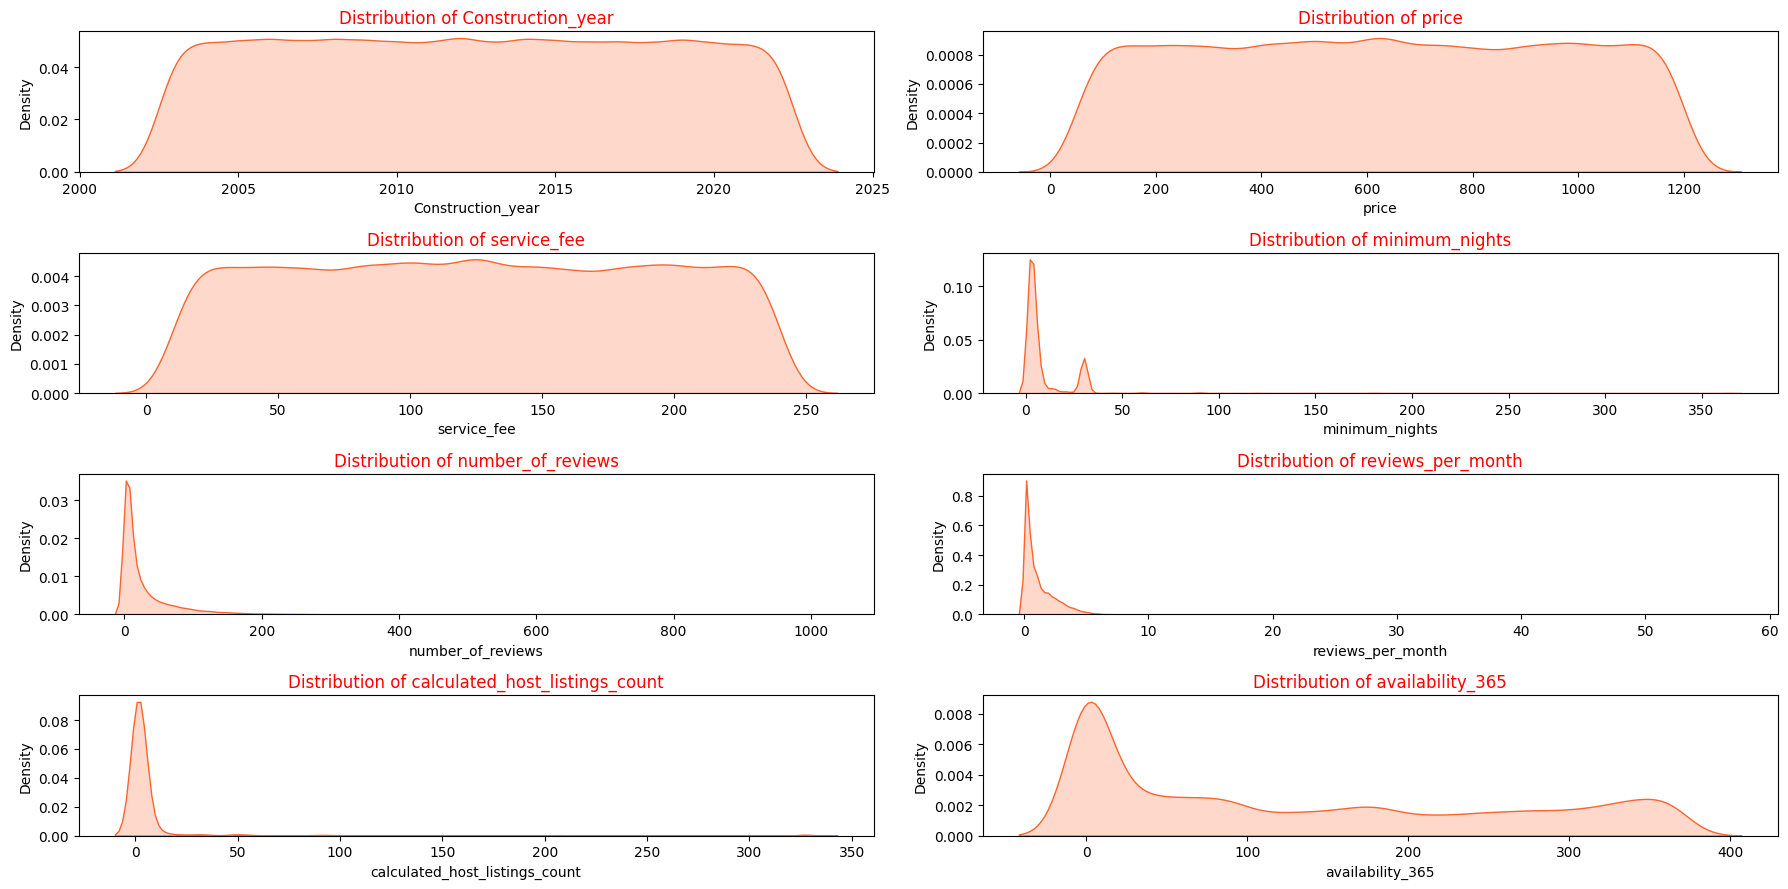

In [31]:
Numerical_col = ["Construction_year","price","service_fee",
"minimum_nights","number_of_reviews","reviews_per_month",
"calculated_host_listings_count","availability_365"]
plt.figure(figsize=(18,9))
for x, col in enumerate(Numerical_col):
    plt.subplot(4,2,x+1)
    sns.kdeplot(x = Airbnb_Clean[col],fill=True, color="#FC642D")
    plt.title(f"Distribution of {col}", fontsize = 12,
    color = "red")
plt.tight_layout()
plt.show()    

## Insights
**1.Construction Year**
- Most properties were constructed between 2000 and 2022, indicating that Airbnb listings largely consist of relatively modern buildings rather than very old properties.

**2.Price**
- Listing prices are widely distributed, ranging from budget to premium segments, showing that Airbnb caters to a diverse customer base with varying affordability levels.

**3.Service Fee**
- Service fees follow a similar distribution to prices, suggesting a strong relationship between listing price and the associated service fee.

**4.Minimum Nights**
- The majority of listings require a low minimum stay (around 2–5 nights), highlighting Airbnb’s focus on short-term accommodations, with fewer listings targeting long-term stays.

**5.Number of Reviews**
- The number of reviews is highly right-skewed, indicating that while most listings receive limited engagement, a small number of listings accumulate a very high volume of reviews.

**6.Reviews per Month**
- Most listings receive fewer than two reviews per month, showing that demand is uneven and concentrated among a limited set of highly active listings.

**7.Calculated Host Listings Count**
- Most hosts manage only one or two listings, while a small proportion of hosts operate a large number of properties, reflecting the presence of both individual and professional hosts on the platform.

**8.Availability (365 Days)**
- Availability varies widely across listings, suggesting different hosting strategies, ranging from full-time rentals to part-time or seasonal availability.

**2.Heatmap correlation of Numerical**

<Axes: >

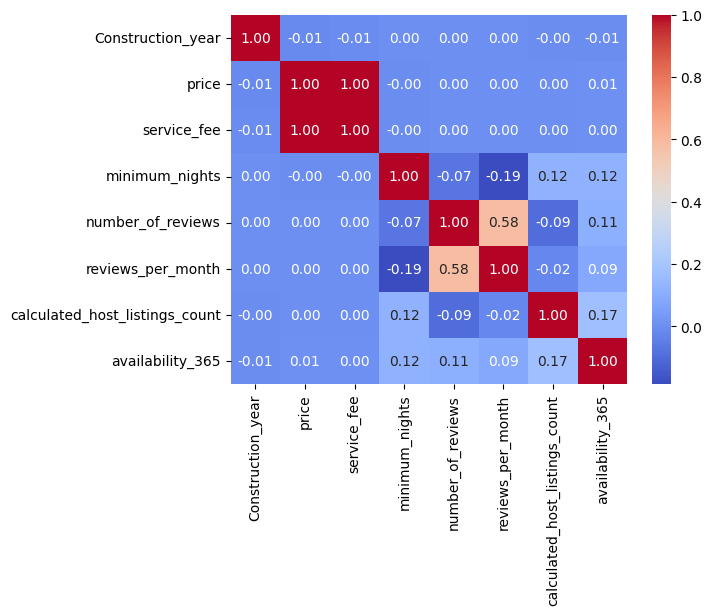

In [32]:
sns.heatmap(Airbnb_Clean[Numerical_col].corr(),
annot=True,fmt=".2f",cmap="coolwarm")

## Insights
**1.Price and Service Fee**
- Price and service fee show a perfect positive correlation, indicating that service fees increase directly with listing prices.

**2.Number of Reviews and Reviews per Month**
- There is a moderate positive correlation (~0.58) between number of reviews and reviews per month, suggesting that listings with higher overall engagement also receive reviews more frequently.

**3.Minimum Nights and Reviews per Month**
- Minimum nights have a weak negative correlation (~-0.19) with reviews per month, implying that listings requiring longer stays tend to receive reviews less frequently.

**4.Availability and Host Listings Count**
- Availability shows a weak positive correlation (~0.17) with the number of listings managed by a host, indicating that hosts with multiple properties tend to keep listings available for more days.

**5.Minimum Nights and Availability**
A weak positive correlation (~0.12) suggests that listings with higher minimum stay requirements are often available for more days in a year.

**6.Construction Year and Other Variables**
Construction year has negligible correlation with price, reviews, and availability, indicating that property age does not strongly influence pricing or demand.

**7.Price and Demand Metrics**
Price shows almost no correlation with number of reviews or reviews per month, suggesting that higher prices do not necessarily reduce or increase customer engagement.

**3.Host Identity Analysis**

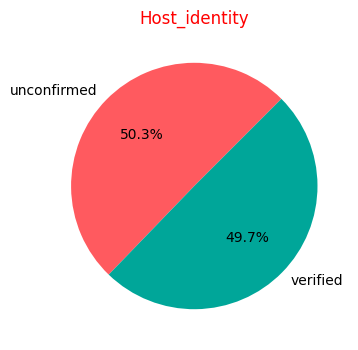

In [33]:
Host_identity = pd.read_sql_query("Select host_identity_verified, count(host_identity_verified) " \
"as count from Airbnb_Clean group by host_identity_verified", engine)
plt.figure(figsize=(6,4))
plt.pie(Host_identity["count"],labels=Host_identity["host_identity_verified"]
,autopct="%1.1f%%",colors=["#FF5A5F","#00A699"],startangle=45)
plt.title("Host_identity", color = "Red", fontsize = 12)
plt.show()

## Insights 
About 50.3% of hosts are not identity verified, while 49.7% of hosts are verified, showing an almost equal distribution between verified and unverified hosts.

**4.Neighbourhood group Analysis**

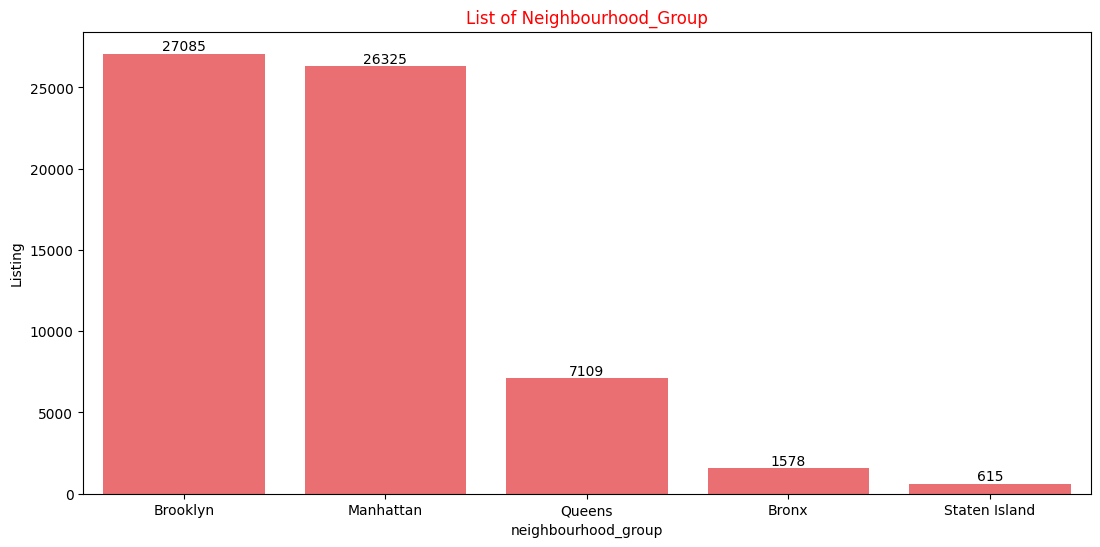

In [34]:
Neighbourhood_group = pd.read_sql_query("Select neighbourhood_group ,count(Neighbourhood) as Listing " \
"from AIrbnb_clean group by neighbourhood_group order by Listing desc", engine)
plt.figure(figsize=(13,6))
ax = sns.barplot(x = "neighbourhood_group", y="Listing",
data = Neighbourhood_group,color="#FF5A5F")
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("List of Neighbourhood_Group",color = "Red", fontsize = 12)
plt.show()

## Insight
Brooklyn and Manhattan contribute the highest total price because they have the largest number of listings.

**5.Cancelation policy Analysis**

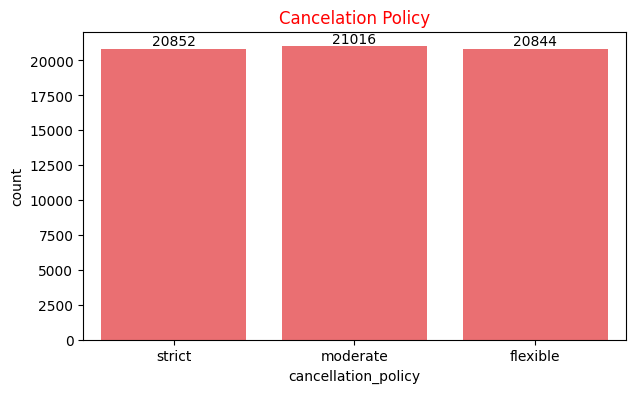

In [ ]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x = "cancellation_policy", data=Airbnb_Clean,color="#FF5A5F")
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Cancelation Policy",color = "Red", fontsize = 12)
plt.show()

## Insights
- The distribution of cancellation policies is almost evenly balanced across listings.
- The **moderate** cancellation policy is used slightly more frequently than strict and flexible policies.
- The difference in counts between the three policies is minimal, indicating no dominant cancellation preference among hosts

**6.Avg Price by Room Types**

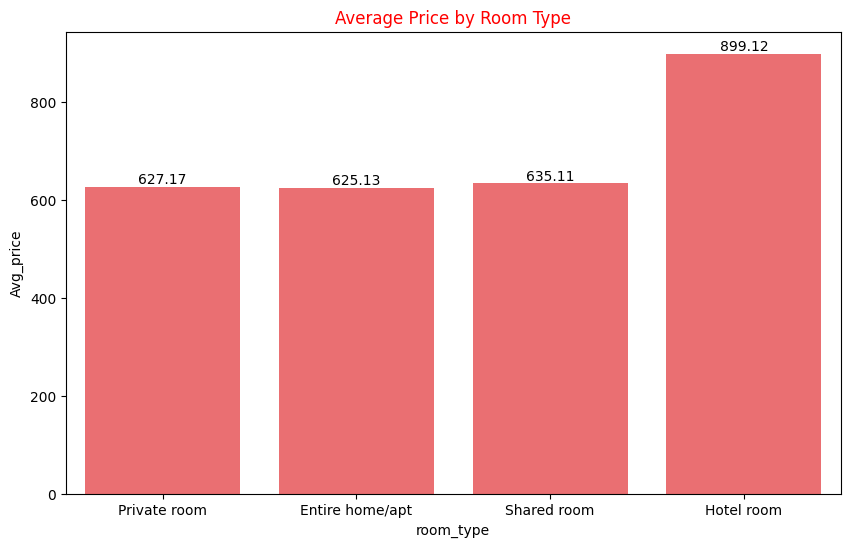

In [43]:
AVg_Price_Room = pd.read_sql_query("Select room_type , round(avg(price),2) as Avg_price from Airbnb_clean group by room_type",engine)
plt.figure(figsize=(10,6))
ax = sns.barplot(x = "room_type", y="Avg_price", 
data= AVg_Price_Room, color="#FF5A5F")
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Average Price by Room Type",
color = "Red", fontsize = 12)
plt.show()


## Insights.
- Hotel rooms have the highest average price at approximately 899.12, making them the most expensive room type on the platform.
- Shared rooms have an average price of about 635.11, slightly higher than private rooms and entire homes/apartments.
- Private rooms and entire homes/apartments have similar average prices, at approximately 627.17 and 625.13 respectively.
- Overall, hotel rooms are priced significantly higher than other room types, while the remaining categories fall within a similar mid-price range.

**7.Service Fees by Room Type**

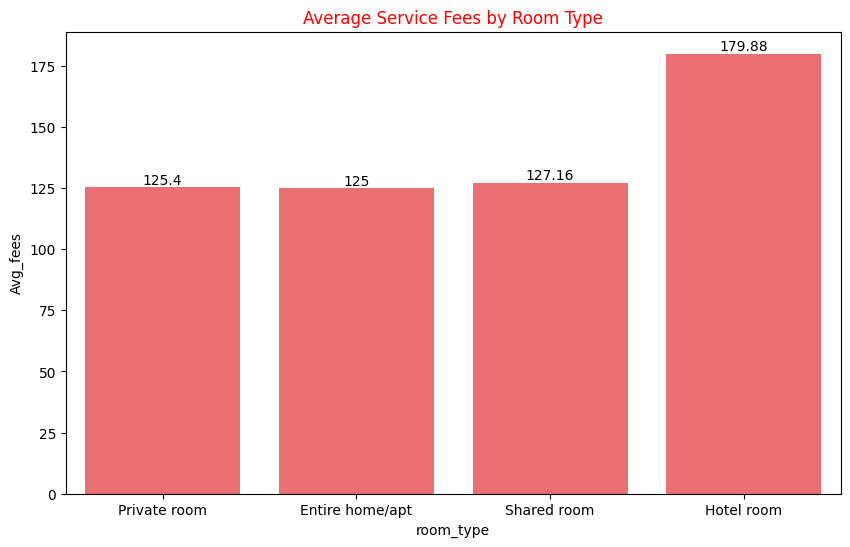

In [45]:
AVg_Price_Room = pd.read_sql_query("Select room_type , round(avg(service_fee),2) as Avg_fees from Airbnb_clean group by room_type",engine)
plt.figure(figsize=(10,6))
ax = sns.barplot(x = "room_type", y="Avg_fees", 
data= AVg_Price_Room, color="#FF5A5F")
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Average Service Fees by Room Type",
color = "Red", fontsize = 12)
plt.show()

## Insights
- Hotel rooms have the highest average service fee at approximately 179.88, making them the most expensive in terms of additional charges.
- Shared rooms have an average service fee of about 127.16, slightly higher than private rooms and entire homes/apartments.
- Private rooms and entire homes/apartments have very similar service fees, at approximately 125.40 and 125.00 respectively.
- Overall, service fees follow the same pricing pattern as room prices, with hotel rooms clearly positioned as a premium category.

**8.Construction Year Analysis**

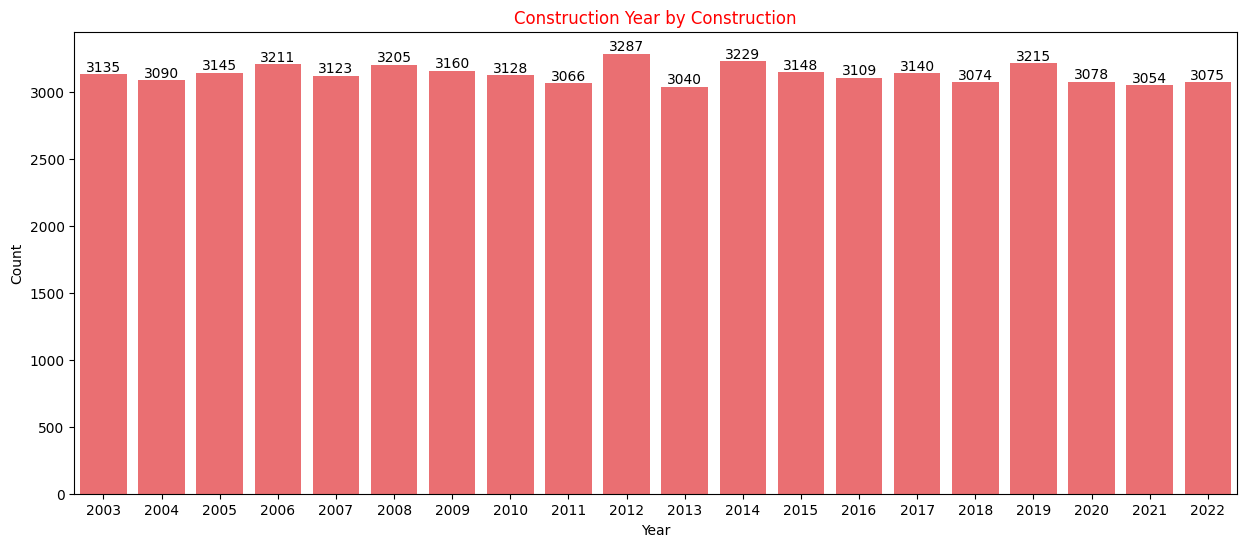

In [67]:
Construction = pd.read_sql_query("Select Construction_year as Year, count(*) as " \
"Count from Airbnb_clean group by Year", engine)
plt.figure(figsize=(15,6))
ax = sns.barplot(x = "Year",y= "Count",
data= Construction, color = "#FF5A5F")
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("Construction Year by Construction", color ="Red",
fontsize =12)
plt.show()


## Insights 
- Property construction is fairly evenly distributed across the years from 2003 to 2022.
- The highest number of properties were constructed in 2012, making it the peak construction year in the dataset.
- After 2012, construction activity remains relatively stable with no extreme rise or drop in subsequent years.
- This indicates consistent property development over time rather than sudden construction spikes.

**9.House Bookable Analysis**

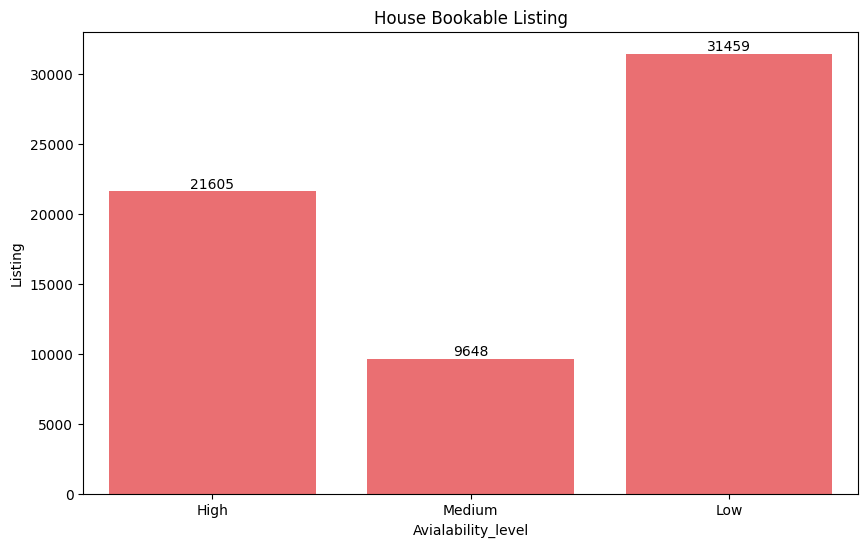

In [74]:
Availabity = pd.read_sql_query("Select Case when availability_365<= 90 Then" \
" 'Low' when availability_365<= 180 Then 'Medium' else 'High' end as " \
"Avialability_level, count(*) as Listing from Airbnb_clean group by Avialability_level", engine)
plt.figure(figsize=(10,6))
ax = sns.barplot(x = "Avialability_level", y = "Listing",
 data=Availabity,color="#FF5A5F")
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("House Bookable Listing")   
plt.show() 

## Insights
- Listings with low availability are the most common, with approximately 31,459 listings, indicating that many properties are available for a limited number of days in a year.
- High availability listings account for around 21,605 listings, showing that a significant portion of properties are available for most of the year.- -
- Medium availability listings are the least common, with about 9,648 listings.
- Overall, the distribution suggests that many hosts operate listings with limited yearly availability rather than maintaining consistent availability throughout the year.

**10.Yearly Price**

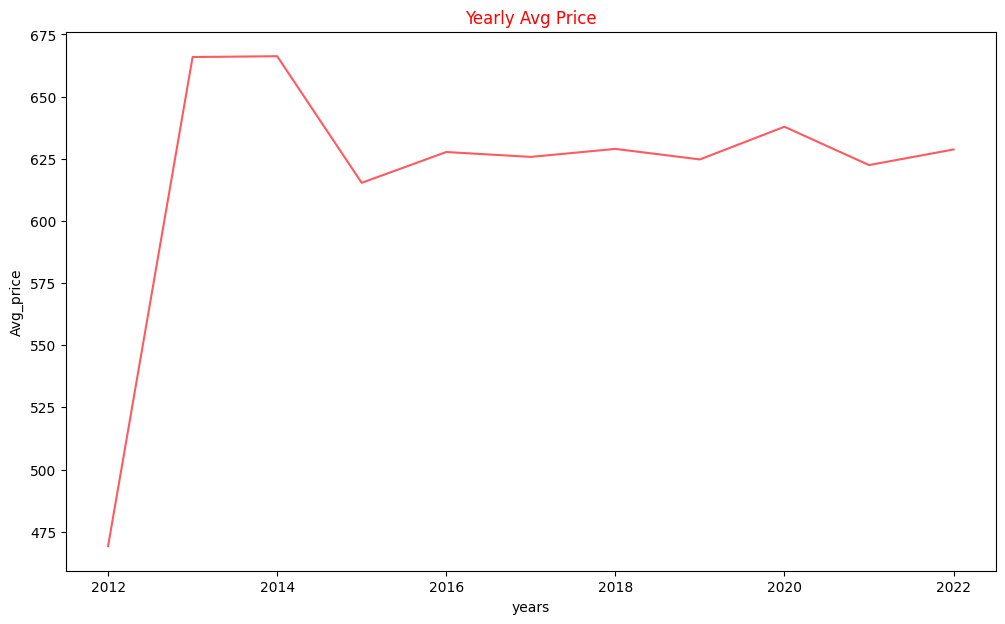

In [89]:
Year_price = pd.read_sql_query("Select Year(Date) as years, Avg(price) " \
" as Avg_price from Airbnb_Clean group by Years", engine)
plt.figure(figsize=(12,7))
sns.lineplot(x = "years", y="Avg_price",
data=Year_price,color= "#FF5A5F")
plt.title("Yearly Avg Price",color = "Red", fontsize = 12)
plt.show()

## Insights
- Average price increased sharply from 2012 to 2013–2014, indicating an initial pricing correction or market adjustment phase.
- After 2015, average prices stabilized, fluctuating within a narrow range around 620–630, showing pricing consistency over time.
- A slight increase is observed around 2020, followed by a minor dip and recovery in later years.
- Overall, the trend suggests that pricing remained relatively stable after early growth, with no extreme volatility in recent years.

**11.Monthly Price**

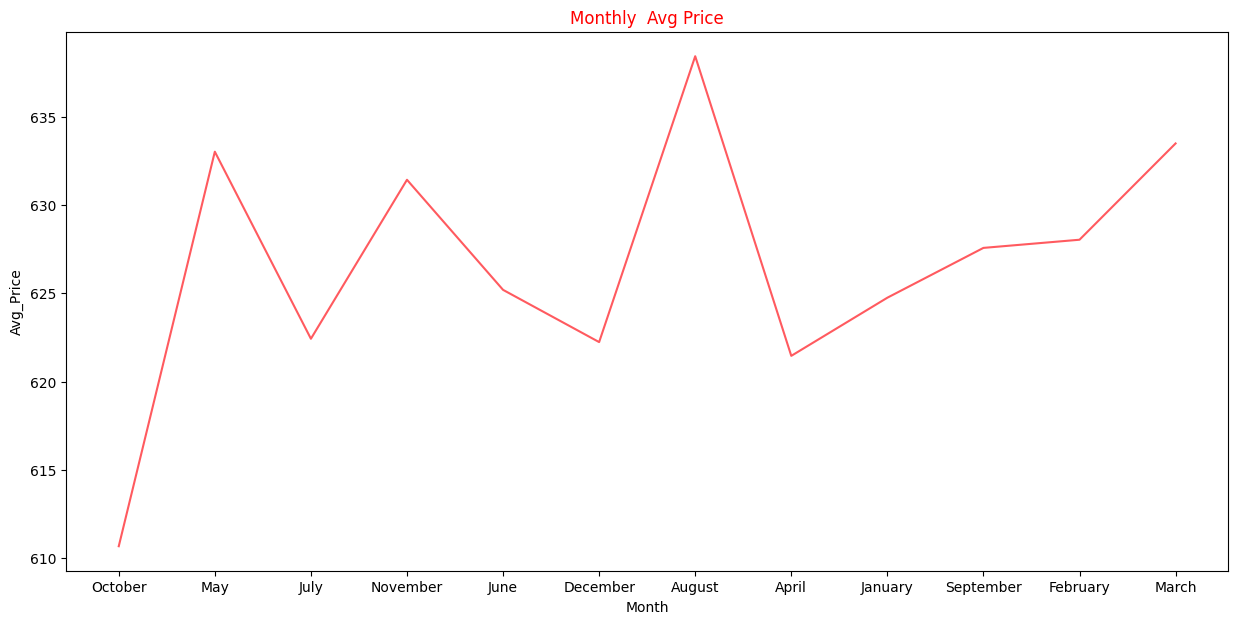

In [88]:
Month_price = pd.read_sql_query("Select MonthName(Date) as Month, avg(price) " \
" as Avg_Price from Airbnb_Clean group by Month", engine)
plt.figure(figsize=(15,7))
sns.lineplot(x = "Month", y="Avg_Price",
data=Month_price,color= "#FF5A5F")
plt.title("Monthly  Avg Price",color = "Red", fontsize = 12)
plt.show()

## Insights
- Average prices remain relatively stable across months, mostly ranging between ~610 and ~640.
- August records the highest average price, indicating peak seasonal pricing during late summer.
- October shows the lowest average price, suggesting relatively lower pricing in that period.
- The overall variation across months is moderate, indicating limited seasonal fluctuation in average prices.